<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

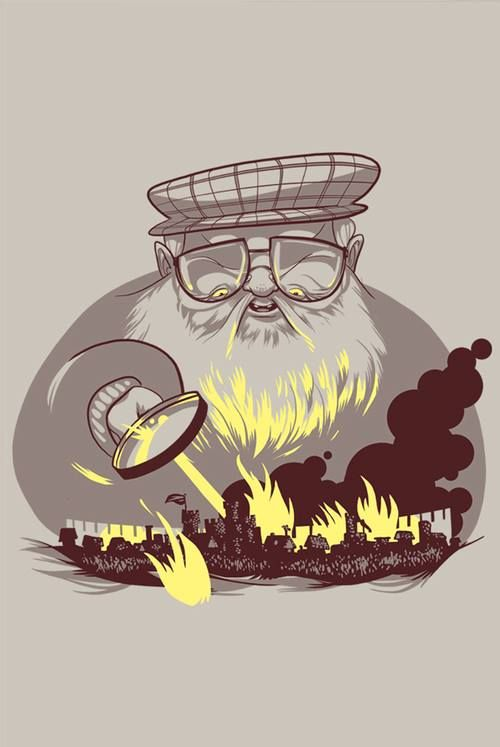

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [4]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 80.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 83.8MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [6]:
thetrain = pd.read_csv('/content/game_of_thrones_train.csv', index_col = 'S.No')
thetest = pd.read_csv('/content/game_of_thrones_test.csv', index_col = 'S.No')
thetest.head() # кажется, все считано верно

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


In [7]:
#временно уберем ключевой признак и объединим датасеты
y = thetrain['isAlive']
thetrain = thetrain.drop(columns = ['isAlive'])
data = pd.concat([thetrain, thetest], ignore_index=False)
data.head()


,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [8]:
data.isna().sum()

,0
name,0
title,1008
male,0
culture,1269
dateOfBirth,1513
mother,1925
father,1920
heir,1923
house,427
spouse,1670


**Ответ:**

*   Дата рождения и возраст несут одинаковую информацию, поэтому один из столбцов можно однозначно удалить (пусть будет `dateOfBirth`). Пропуск по `age` заполним медианой
*   В стобцах по типу `mother`-`isAliveMother` пропуск есть, потому что родственник не является важной частью сюжета. заполним пропуски при помощи отдельного значения 'no'. Это даст дополнительную категорию при OHE
* Аналогичным образом поступим для `culture` и `house`
* В случае с `title` попробуем посмотреть, есть ли знатные персонажи без титула:


In [9]:
data[(data['isNoble'] == 1) & (data['title'].isna())]

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,


Вывод: признак важный и влияет на вероятность смерти. Оставим его и также заполним пропуск по нему при помощи 'no'

In [10]:
data = data.drop(columns=['dateOfBirth'])

# Список столбцов, в которых нужно заменить пропуски на 'no'
columns_to_fill = ['title', 'culture', 'mother', 'father', 'heir', 'house',
                   'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']

# Заполняем пропуски значением 'no' в указанных столбцах для обоих датафреймов
data[columns_to_fill] = data[columns_to_fill].fillna('no')

# Заполняем пропуски медианой для возраста

data['age'] = data['age'].fillna((data['age'].median()))


In [11]:
data.isna().sum()

,0
name,0
title,0
male,0
culture,0
mother,0
father,0
heir,0
house,0
spouse,0
book1,0


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [12]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [13]:
popularity_threshold = 0.1
data['isPopular'] = (data['popularity'] > popularity_threshold).astype(int)
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)


def simplify_culture(culture):
    for key, values in cult.items():
        if culture.lower() in values:
            return key
    return culture
data['culture'] = data['culture'].apply(simplify_culture)

data.head()

,name,title,male,culture,mother,father,heir,house,spouse,book1,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,no,1,no,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,no,no,0,...,0.0,0.0,no,0,0,27.0,11,0.605351,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,no,no,no,House Frey,Perra Royce,1,...,no,no,1.0,1,1,97.0,1,0.896321,1,1
3,Addison Hill,Ser,1,no,no,no,no,House Swyft,no,0,...,no,no,no,0,1,27.0,0,0.267559,1,0
4,Aemma Arryn,Queen,0,no,no,no,no,House Arryn,Viserys I Targaryen,0,...,no,no,0.0,1,1,23.0,0,0.183946,1,0
5,Sylva Santagar,Greenstone,0,Dornish,no,no,no,House Santagar,Eldon Estermont,0,...,no,no,1.0,1,1,29.0,0,0.043478,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

**Ответ:**


*   до этого удалили дату рождения, так как она дублирует возраст
*   Имя дублирует id (и есть надежда, что не ведет к изменению вероятности смерти....(
* при обработке категориальных переменных переменные `mother`	`father`	`heir`	`spouse` дадут много мусора, поэтому их тоже можно удалить



In [14]:
data.drop(columns=['name', 'mother',	'father',	'heir',	'spouse'], inplace = True)
data.head()

,title,male,culture,house,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,
1,no,1,no,no,0,0,0,0,0,1.0,0.0,0.0,no,0,0,27.0,11,0.605351,1,1
2,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,no,no,no,1.0,1,1,97.0,1,0.896321,1,1
3,Ser,1,no,House Swyft,0,0,0,1,0,no,no,no,no,0,1,27.0,0,0.267559,1,0
4,Queen,0,no,House Arryn,0,0,0,0,0,no,no,no,0.0,1,1,23.0,0,0.183946,1,0
5,Greenstone,0,Dornish,House Santagar,0,0,0,1,0,no,no,no,1.0,1,1,29.0,0,0.043478,0,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

**Ответ:**

переменная является бинарной (категориальной). Персонаж либо жив, либо мертв

isAlive
1    1212
0     345
Name: count, dtype: int64


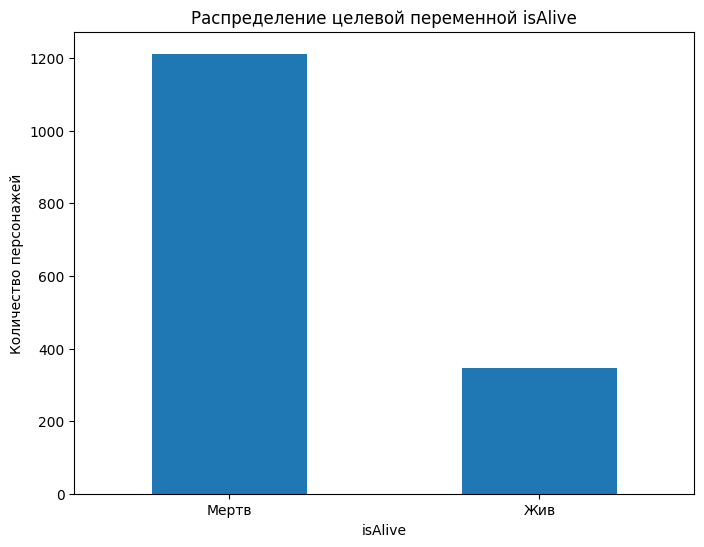

In [15]:
thetrain = pd.read_csv('/content/game_of_thrones_train.csv', index_col = 'S.No')

is_alive_counts = thetrain['isAlive'].value_counts()
print(is_alive_counts)


plt.figure(figsize=(8, 6))
is_alive_counts.plot(kind='bar')
plt.title('Распределение целевой переменной isAlive')
plt.ylabel('Количество персонажей')
plt.xticks(ticks=[0, 1], labels=['Мертв', 'Жив'], rotation=0)
plt.show()

Данные не очень сбалансированы - большая часть персонажей мертвы( но работаем с тем, что есть

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [16]:
categorical = ['title',	'male',	'culture',	'house', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble']
data = pd.get_dummies(data, columns = categorical, drop_first = True)
data.head()

,book1,book2,book3,book4,book5,age,numDeadRelations,popularity,isPopular,boolDeadRelations,...,isAliveMother_1.0,isAliveMother_no,isAliveFather_1.0,isAliveFather_no,isAliveHeir_1.0,isAliveHeir_no,isAliveSpouse_1.0,isAliveSpouse_no,isMarried_1,isNoble_1
S.No,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,27.0,11,0.605351,1,1,...,True,False,False,False,False,False,False,True,False,False
2,1,1,1,1,1,97.0,1,0.896321,1,1,...,False,True,False,True,False,True,True,False,True,True
3,0,0,0,1,0,27.0,0,0.267559,1,0,...,False,True,False,True,False,True,False,True,False,True
4,0,0,0,0,0,23.0,0,0.183946,1,0,...,False,True,False,True,False,True,False,False,True,True
5,0,0,0,1,0,29.0,0,0.043478,0,0,...,False,True,False,True,False,True,True,False,True,True


In [17]:
numer = ['age', 'popularity', 'numDeadRelations']
data[numer].corr()

,age,popularity,numDeadRelations
age,1.000000,-0.009845,-0.064703
popularity,-0.009845,1.000000,0.614984
numDeadRelations,-0.064703,0.614984,1.000000


**Ответ:** есть хорошая корелляция между popularity и numDeadRelations. При усовершенствовании модели можно будет рассмотреть сокращение размерности или удаление одного из этих признаков

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

Посмотрим сначала на самые простые категориальные переменные:

In [18]:
# Влияние пола на выживаемость
print(thetrain.groupby('male')['isAlive'].mean())

male
0    0.852433
1    0.727174
Name: isAlive, dtype: float64


In [19]:
print(thetrain.groupby('isMarried')['isAlive'].mean())

isMarried
0    0.786293
1    0.725000
Name: isAlive, dtype: float64


In [20]:
print(thetrain.groupby('isNoble')['isAlive'].mean())

isNoble
0    0.800687
1    0.750000
Name: isAlive, dtype: float64


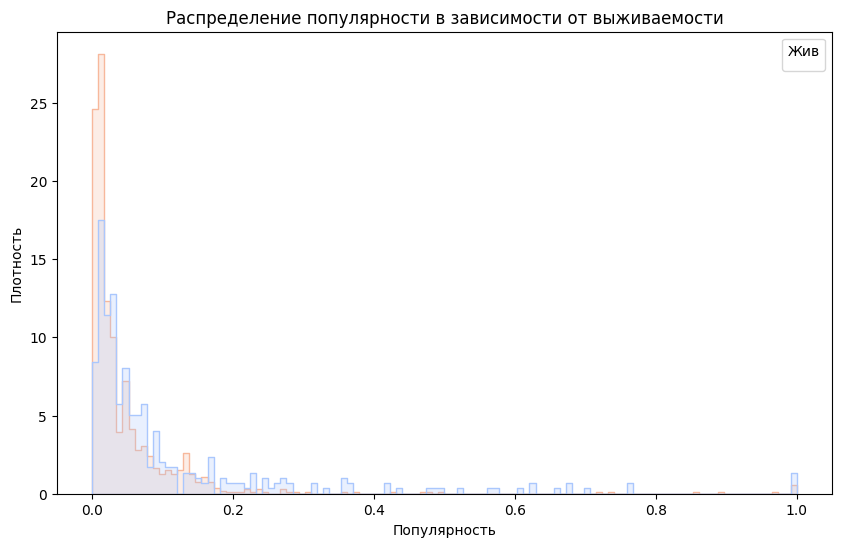

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=thetrain, x='popularity', hue='isAlive', element='step', stat='density', common_norm=False, palette='coolwarm')

# Добавление заголовков и меток осей
plt.title('Распределение популярности в зависимости от выживаемости')
plt.xlabel('Популярность')
plt.ylabel('Плотность')
plt.legend(title='Жив')
plt.show()

Вывод: все рассмотренные признаки влияют на целевую переменную (пока, увы, не ясно, статистически значимо это влияние или нет)

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [22]:
data = data.drop(columns = ['age'])
train = data[data.index < 1558]
test = data[data.index >= 1558]
X = train
y = y
X

,book1,book2,book3,book4,book5,numDeadRelations,popularity,isPopular,boolDeadRelations,title_Andals,...,isAliveMother_1.0,isAliveMother_no,isAliveFather_1.0,isAliveFather_no,isAliveHeir_1.0,isAliveHeir_no,isAliveSpouse_1.0,isAliveSpouse_no,isMarried_1,isNoble_1
S.No,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,11,0.605351,1,1,False,...,True,False,False,False,False,False,False,True,False,False
2,1,1,1,1,1,1,0.896321,1,1,False,...,False,True,False,True,False,True,True,False,True,True
3,0,0,0,1,0,0,0.267559,1,0,False,...,False,True,False,True,False,True,False,True,False,True
4,0,0,0,0,0,0,0.183946,1,0,False,...,False,True,False,True,False,True,False,False,True,True
5,0,0,0,1,0,0,0.043478,0,0,False,...,False,True,False,True,False,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,0,1,1,0,0,0.160535,1,0,False,...,False,True,False,True,False,True,False,True,False,True
1554,1,1,0,0,0,0,0.040134,0,0,False,...,False,True,False,True,False,True,False,True,False,False
1555,0,1,1,1,1,0,0.076923,0,0,False,...,False,True,False,True,False,True,False,True,False,False


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 711)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [25]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [26]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [27]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [28]:
from sklearn.model_selection import GridSearchCV


models_and_parameters = {
    'AdaBoost': (AdaBoostClassifier(random_state = 711), {'n_estimators': [10, 50, 100, 150, 200, 250]}),
    'RandomForest': (RandomForestClassifier(random_state = 711), {'n_estimators': [10, 20, 50, 100, 200, 500], 'max_depth': [None, 10, 20, 50, 100]}),
    'GaussianProcess': (GaussianProcessClassifier(random_state = 711), {'max_iter_predict': [10, 100, 150, 200, 250, 500, 1000]}),
    'GaussianNB': (GaussianNB(), {}),  # У Naive Bayes нет гиперпараметров для настройки
    'KNeighbors': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 10, 15, 20, 25]}),
    'SVC': (SVC(random_state = 711), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'LogReg': (LogisticRegression(random_state = 711), {'C': [0.1, 1, 10], 'solver': ['sag', 'saga', 'liblinear']}),
    'DecisionTree': (DecisionTreeClassifier(random_state = 711), {'max_depth': [None, 10, 20, 50, 100]})
}

# Итерация по всем моделям и их гиперпараметрам
best_estimators = {}
for model_name, (model, params) in models_and_parameters.items():
    grid_search = GridSearchCV(model, params, cv=5)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Предсказания на X_test для каждой модели с лучшими гиперпараметрами
predictions = {}
for model_name, estimator in best_estimators.items():
    predictions[model_name] = estimator.predict(X_test)
    print(f"Predictions for {model_name}: {predictions[model_name]}")



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best parameters for AdaBoost: {'n_estimators': 100}
Best parameters for RandomForest: {'max_depth': 50, 'n_estimators': 100}
Best parameters for GaussianProcess: {'max_iter_predict': 10}
Best parameters for GaussianNB: {}
Best parameters for KNeighbors: {'n_neighbors': 15}
Best parameters for SVC: {'C': 0.1, 'kernel': 'linear'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best parameters for LogReg: {'C': 0.1, 'solver': 'liblinear'}
Best parameters for DecisionTree: {'max_depth': 10}
Predictions for AdaBoost: [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
Predictions for RandomForest: [1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [29]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [30]:
accuracies = {}
for model_name, preds in predictions.items():
    acc = accuracy_score(y_test, preds)
    accuracies[model_name] = acc
    print(f"Accuracy for {model_name}: {acc:.4f}")

Accuracy for AdaBoost: 0.7853
Accuracy for RandomForest: 0.8013
Accuracy for GaussianProcess: 0.7917
Accuracy for GaussianNB: 0.4295
Accuracy for KNeighbors: 0.8045
Accuracy for SVC: 0.7788
Accuracy for LogReg: 0.7949
Accuracy for DecisionTree: 0.7885


Выберите лучшую модель.

**Лучшей моделью выглядит KNeighbors, но он склонен к переобучению. Попробуем LogReg**

In [31]:
sub = best_estimators['LogReg'].predict(test)


### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [32]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.45MB/s]


In [33]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [34]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [35]:
submission['isAlive'] = sub
submission

,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [36]:
submission.to_csv("/content/new_submission.csv", index=False)

### Вместо ПостСкриптума

Сдав задание в тестирующую систему, я получил более низкие (в среднем на 0.04) метрики качества. Подумав, я понял, что все из-за ОЧЕНЬ СИЛЬНОГО ПЕРЕОБУЧЕНИЯ моделей. Я решил попробовать удалить как можно больше признаков и добавить логический признак о равенстве суммы возраста и года рождения текущему году во вселенной, а также добавил пару моделей бустинга:

In [38]:
thetrain = pd.read_csv('/content/game_of_thrones_train.csv', index_col = 'S.No')
thetest = pd.read_csv('/content/game_of_thrones_test.csv', index_col = 'S.No')
thetest.head() # кажется, все считано верно
y = thetrain['isAlive']
thetrain1 = thetrain
thetrain = thetrain.drop(columns = ['isAlive'])
data = pd.concat([thetrain, thetest], ignore_index=False)
data.isna().sum()
def check_sum(row):
    if pd.isnull(row['dateOfBirth']) or pd.isnull(row['age']):
        return -1
    return 1 if row['dateOfBirth'] + row['age'] == 305 else 0

# Применение функции к каждой строке DataFrame и создание нового столбца
data['result'] = data.apply(check_sum, axis=1)

# Применение one-hot encoding к столбцу 'result'
data = pd.get_dummies(data, columns=['result'], prefix='result', drop_first = True)

popularity_threshold = 0.1
data['isPopular'] = (data['popularity'] > popularity_threshold).astype(int)
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)

data = data.drop(columns = ['title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'spouse', 'house', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'age'])
def get_last_word(full_name):
    return full_name.split()[-1]
data['name'] = data['name'].apply(get_last_word)
data = data.drop(columns = ['name'])
train = data[data.index < 1558]
test = data[data.index >= 1558]
X = train
y = y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


models_and_parameters = {
    'AdaBoost': (AdaBoostClassifier(random_state = 7, algorithm='SAMME'), {'n_estimators': [50, 100, 110, 120, 150]}),
    'RandomForest': (RandomForestClassifier(random_state = 7), {'n_estimators': [5, 10, 30, 40, 50, 100], 'max_depth': [5, 10, 30, 40, 50]}),
    'GaussianProcess': (GaussianProcessClassifier(random_state = 7), {'max_iter_predict': [5, 10, 50, 100]}),
    'GaussianNB': (GaussianNB(), {}),  # У Naive Bayes нет гиперпараметров для настройки
    'KNeighbors': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 10, 15, 20, 25, 35]}),
    'SVC': (SVC(random_state = 711), {'C': [0.01, 0.1, 1, 10], 'kernel': ['rbf']}),
    'LogReg': (LogisticRegression(random_state = 711), {'C': [0.01, 0.1, 1, 10], 'solver': ['sag', 'saga', 'liblinear']}),
    'DecisionTree': (DecisionTreeClassifier(random_state = 42), {'max_depth': [None, 10, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 30, 50, 100], 'max_features' : ['log2', 'sqrt', None], 'criterion': ['gini', 'entropy', 'log_loss']})
}

# Итерация по всем моделям и их гиперпараметрам
best_estimators = {}
for model_name, (model, params) in models_and_parameters.items():
    print(model, params)
    grid_search = GridSearchCV(model, params, cv=6, scoring = 'balanced_accuracy', n_jobs = -1)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Предсказания на X_test для каждой модели с лучшими гиперпараметрами
predictions = {}
for model_name, estimator in best_estimators.items():
    predictions[model_name] = estimator.predict(X_test)
    print(f"Predictions for {model_name}: {predictions[model_name]}")
from sklearn.metrics import accuracy_score
accuracies = {}
for model_name, preds in predictions.items():
    acc = accuracy_score(y_test, preds)
    accuracies[model_name] = acc
    print(f"Accuracy for {model_name}: {acc:.4f}")

AdaBoostClassifier(algorithm='SAMME', random_state=7) {'n_estimators': [50, 100, 110, 120, 150]}
Best parameters for AdaBoost: {'n_estimators': 120}
RandomForestClassifier(random_state=7) {'n_estimators': [5, 10, 30, 40, 50, 100], 'max_depth': [5, 10, 30, 40, 50]}
Best parameters for RandomForest: {'max_depth': 30, 'n_estimators': 10}
GaussianProcessClassifier(random_state=7) {'max_iter_predict': [5, 10, 50, 100]}
Best parameters for GaussianProcess: {'max_iter_predict': 5}
GaussianNB() {}
Best parameters for GaussianNB: {}
KNeighborsClassifier() {'n_neighbors': [3, 5, 7, 10, 15, 20, 25, 35]}
Best parameters for KNeighbors: {'n_neighbors': 3}
SVC(random_state=711) {'C': [0.01, 0.1, 1, 10], 'kernel': ['rbf']}
Best parameters for SVC: {'C': 10, 'kernel': 'rbf'}
LogisticRegression(random_state=711) {'C': [0.01, 0.1, 1, 10], 'solver': ['sag', 'saga', 'liblinear']}
Best parameters for LogReg: {'C': 10, 'solver': 'liblinear'}
DecisionTreeClassifier(random_state=42) {'max_depth': [None, 10, 1

GradientBoosting:

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Определяем гиперпараметры для поиска
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10, 15, 50]
}

# Создаем модель
model = GradientBoostingClassifier(random_state=0)

# Настраиваем GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Обучаем модель с помощью GridSearchCV
grid_search.fit(X_train, y_train)

# Находим наилучшие параметры
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

# Используем лучшую модель для предсказания
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Оцениваем точность
print("Accuracy:", accuracy_score(y_test, y_pred))

Лучшие параметры: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100}
Accuracy: 0.842948717948718


In [42]:
# xgboost
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='error')

# Определение сетки гиперпараметров для перебора
param_grid = {
    'n_estimators': [5, 10, 50],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 10, 50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Обучение модели с перебором гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print("Best parameters found: ", grid_search.best_params_)

# Оценка модели с лучшими параметрами
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50, 'subsample': 1.0}
Accuracy: 0.8653846153846154


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:00:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# catboost
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Создание модели CatBoostClassifier
model = CatBoostClassifier(silent=True)

# Определение сетки гиперпараметров для перебора
param_grid = {
    'iterations': [5, 10, 50, 100],
    'depth': [5, 10, 50, 100],
    'colsample_bylevel': [0.8, 1.0]
}

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Обучение модели с перебором гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print("Best parameters found: ", grid_search.best_params_)

# Оценка модели с лучшими параметрами
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))